## Importing libraries

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Hand on : Pick a different grid square and find its peak SMS hour.

#Assignment 1

##Assignment Overview

Total Points: 100

Duration: 2 weeks (Tuesday Jan 20th, 6 am  - Wednesday Feb 04rd,6am)

Deliverables:

  - Jupyter notebook (.ipynb) or Module(.py) with answers and visualizations
  - README explaining your approach(2 pages)
    - Overview of your approach
    - Key decisions you made (e.g., how you handled missing values)
    - Summary of key findings
  - All submissions should be hosted on your github account.(submit the link to the repo alongside your homework)


###TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,
sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

2. Create a clean, analysis-ready dataset.

####Requirements:
- Load all 3 activity files
- Add date and time columns
- Combine into single dataframe
- Handle any missing values (Hint: Fill with mean)
- Add aggregate columns (total_sms, total_calls, total_internet)

####Questions (50 points):
- How many total records across all 3 datasets? (10)
- How many unique grid squares (CellID) are there? (5)
- How many unique country codes appear in the data? (5)
- Are there any missing values?
  - If yes, input missing/NaN with the mean of each columns. (10)
  - For which columns are missing values most common? (5)
  - How many records did you modify? (5)

- What is the most common peak hour across all grids? (5)
  - What hour has the lowest activity? (5)
  - Calculate and report: mean, median, std, min, max for total calls by hour (15)

- What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)


- Do international calls happen at different times than domestic? (compare hourly patterns) (5)

- Use numpy to perform statistical comparisons between different conditions. (5)

  Compare:
    1. Domestic (Italy) vs International calls.
        - What percentage of calls are international vs domestic? (5)
        - What percentage of SMS are international vs domestic? (5)
        - Are international calls more incoming or outgoing (calculate the ratio) (5)
    2. Different activity types.
        - Is there a correlation between SMS volume and Call volume at the grid level? (5)

This part for Kaggle was used on the google.colab but while doing the same on vs code, I used the downloaded files, thus the commint the below section

In [3]:
# from google.colab import userdata
# import os

# # These lines pull the values you just saved in the Secrets tab
# os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
# os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# # This command uses those credentials to download the data
# !kaggle datasets download -d marcodena/mobile-phone-activity
# !unzip mobile-phone-activity.zip

In [6]:
import os
files = os.listdir()
assignment_files = [
    'sms-call-internet-mi-2013-11-02.csv',
    'sms-call-internet-mi-2013-11-04.csv',
    'sms-call-internet-mi-2013-11-06.csv'
]

for f in assignment_files:
    if f in files:
        print(f"File found: {f}")
    else:
        print(f"Missing: {f}")

File found: sms-call-internet-mi-2013-11-02.csv
File found: sms-call-internet-mi-2013-11-04.csv
File found: sms-call-internet-mi-2013-11-06.csv


In [16]:
import pandas as pd
import numpy as np

# Loading the 3 specific activity files
files_to_load = [
    'sms-call-internet-mi-2013-11-02.csv',
    'sms-call-internet-mi-2013-11-04.csv',
    'sms-call-internet-mi-2013-11-06.csv'
]

print("Loading and Merging Data into single dataframe")
dataframes = [pd.read_csv(file) for file in files_to_load]
full_df = pd.concat(dataframes, ignore_index=True)

# Adding the time features
full_df['datetime'] = pd.to_datetime(full_df['datetime'])
full_df['hour'] = full_df['datetime'].dt.hour

# Handling Missing Values per assignment requirment

activity_cols = ['smsin', 'smsout', 'callin', 'callout', 'internet']
null_counts_before = full_df[activity_cols].isnull().sum()

# Next, is to identify records with at least one NaN in activity columns
records_to_modify = full_df[activity_cols].isnull().any(axis=1).sum()

# Fill NaN values with the respective mean
full_df[activity_cols] = full_df[activity_cols].fillna(full_df[activity_cols].mean())

# Aggregating part
full_df['total_sms'] = full_df['smsin'] + full_df['smsout']
full_df['total_calls'] = full_df['callin'] + full_df['callout']
full_df['total_activity'] = full_df['total_sms'] + full_df['total_calls'] + full_df['internet']

# Answer per requirement/ assignment questions
print("\n" + "="*40)
print("Answering the ASSIGNMENT per their ordder")
print("="*40)

# Statictics 
print(f"1. Total records across 3 datasets: {len(full_df)}")
print(f"2. Unique grid squares (CellID): {full_df['CellID'].nunique()}")
print(f"3. Unique country codes: {full_df['countrycode'].nunique()}")

# The misssing values part
print(f"4. Were there missing values? {'Yes' if null_counts_before.sum() > 0 else 'No'}")
print(f"5. Column where missing values are most common: {null_counts_before.idxmax()} ({null_counts_before.max()} NaNs)")
print(f"6. Total records modified (NaN to Mean): {records_to_modify}")

# Peak and lowesst activivty
hourly_activity = full_df.groupby('hour')['total_activity'].sum()
print(f"7. Most common peak hour: {hourly_activity.idxmax()}:00")
print(f"8. Hour with lowest activity: {hourly_activity.idxmin()}:00")

# Statistics fro the calls/hour
call_stats = full_df.groupby('hour')['total_calls'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\n9. Hourly Call Statistics (Mean, Median, Std, Min, Max):")
print(call_stats)

# daytime versus the nighttime
day_mask = full_df['hour'].between(6, 20)
day_act = full_df[day_mask]['total_activity'].sum()
night_act = full_df[~day_mask]['total_activity'].sum()
total_act = day_act + night_act
print(f"\n10. Daytime Activity (6am-8pm): {(day_act/total_act)*100:.2f}%")
print(f"    Nighttime Activity (8pm-6am): {(night_act/total_act)*100:.2f}%")

# domstric versus internationals using the code 39 for italy
full_df['is_domestic'] = full_df['countrycode'] == 39
total_calls_sum = full_df['total_calls'].sum()
total_sms_sum = full_df['total_sms'].sum()

intl_calls_pct = (full_df[~full_df['is_domestic']]['total_calls'].sum() / total_calls_sum) * 100
dom_calls_pct = 100 - intl_calls_pct

intl_sms_pct = (full_df[~full_df['is_domestic']]['total_sms'].sum() / total_sms_sum) * 100
dom_sms_pct = 100 - intl_sms_pct

intl_df = full_df[~full_df['is_domestic']]
intl_ratio = np.sum(intl_df['callin']) / np.sum(intl_df['callout'])

print(f"\n11. Call Comparison: Domestic {dom_calls_pct:.2f}% vs International {intl_calls_pct:.2f}%")
print(f"12. SMS Comparison: Domestic {dom_sms_pct:.2f}% vs International {intl_sms_pct:.2f}%")
print(f"13. International Call Ratio (Incoming/Outgoing): {intl_ratio:.4f}")
print(f"    (Status: {'More Incoming' if intl_ratio > 1 else 'More Outgoing'})")

# Part for the correlation
correlation = full_df[['total_sms', 'total_calls']].corr().iloc[0, 1]
print(f"\n14. Correlation between SMS and Call volume: {correlation:.4f}")

Loading and Merging Data into single dataframe

Answering the ASSIGNMENT per their ordder
1. Total records across 3 datasets: 6564031
2. Unique grid squares (CellID): 10000
3. Unique country codes: 302
4. Were there missing values? Yes
5. Column where missing values are most common: smsout (5025738 NaNs)
6. Total records modified (NaN to Mean): 5880441
7. Most common peak hour: 17:00
8. Hour with lowest activity: 4:00

9. Hourly Call Statistics (Mean, Median, Std, Min, Max):
           mean     median        std     min        max
hour                                                    
0     10.280157  13.425298   5.279040  0.0002   223.4941
1      9.928661  13.425298   5.129893  0.0000   141.9847
2      9.894713  13.425298   5.329786  0.0000   210.9691
3      9.953373  13.425298   5.649571  0.0000   298.3541
4     10.235666  13.425298   5.294288  0.0000   255.0555
5     10.029019  13.425298   5.395003  0.0000   177.1690
6     10.339697  13.425298   4.969421  0.0002   201.3488
7     1

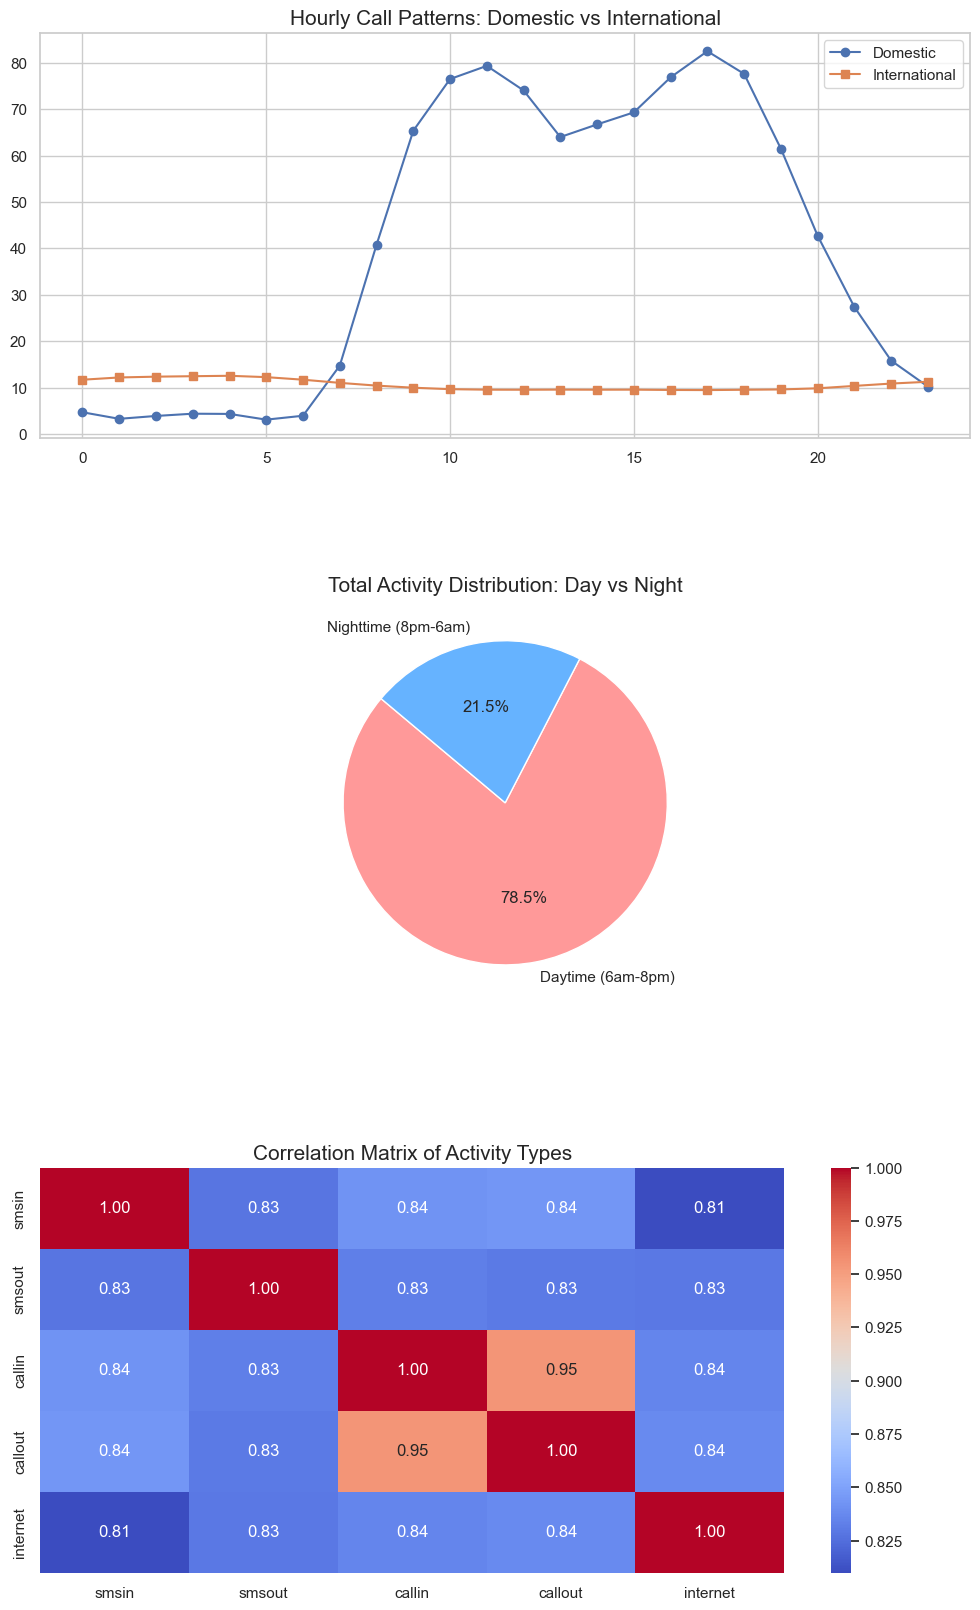

In [17]:
sns.set(style="whitegrid")

# Creating a figure with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(12, 20))

#variable needed for figure 1
hourly_domestic = full_df[full_df['is_domestic']].groupby('hour')['total_calls'].mean()
hourly_intl = full_df[~full_df['is_domestic']].groupby('hour')['total_calls'].mean()

#variable needed for figure 2
labels = ['Daytime (6am-8pm)', 'Nighttime (8pm-6am)']
sizes = [day_act, night_act]
colors = ['#ff9999','#66b3ff']

#variable needed for figure 3
corr_matrix = full_df[['smsin', 'smsout', 'callin', 'callout', 'internet']].corr()

# Figure 1: hourly patterns
axes[0].plot(hourly_domestic.index, hourly_domestic.values, label='Domestic', marker='o')
axes[0].plot(hourly_intl.index, hourly_intl.values, label='International', marker='s')
axes[0].set_title('Hourly Call Patterns: Domestic vs International', fontsize=15)
axes[0].legend()

# Figure 2: activity distribution
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Total Activity Distribution: Day vs Night', fontsize=15)

# Figure 3: correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2])
axes[2].set_title('Correlation Matrix of Activity Types', fontsize=15)

plt.subplots_adjust(hspace=0.4)

plt.show()